## section 2.1 time series

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import src.utility.gen_ts_synthetic as gen_syn
import pandas as pd
import os
import json
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from src.utility.utility_mdf import get_data_from_file
import matplotlib.cm as cm 

## Figure 2.1

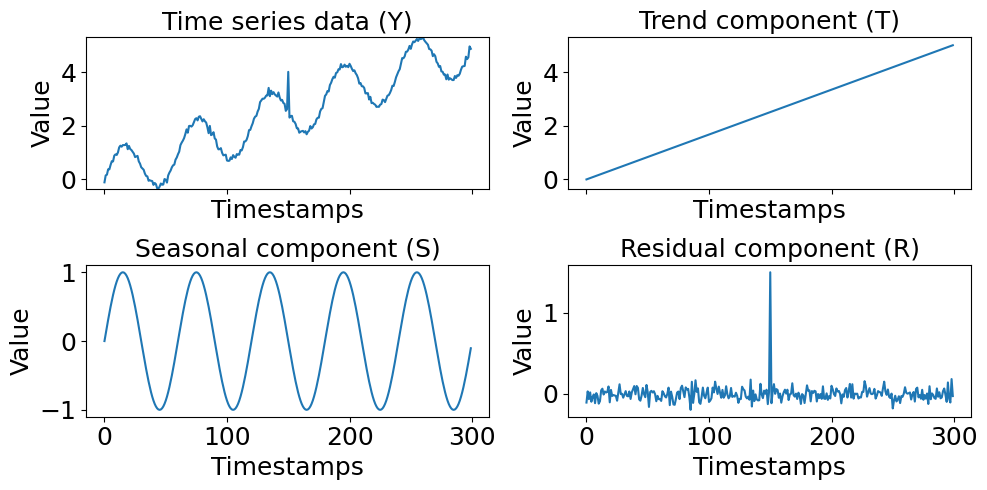

In [15]:
np.random.seed(0)
dataset = gen_syn.generate_syn1()

trend = np.linspace(0, 5, num=300)
seasonal = gen_syn.sinewave(300, 60, 1)
residual = 0.07 * np.random.randn(len(trend))
residual[150] = 1.5

ts = trend+seasonal+residual
fig, axes = plt.subplots(2, 2, figsize=(10, 5), sharex=True)
axes = axes.flatten()
title = ['Time series data (Y)', 'Trend component (T)', 'Seasonal component (S)', 'Residual component (R)']
axes[0].plot(ts, label='ts')
axes[1].plot(trend, label='trend')
axes[2].plot(seasonal, label='seasonal')
axes[3].plot(residual, label='residual')
min_y = min(ts)
max_y = max(ts)
# Set common x and y ticks
for i, ax in enumerate(axes):
    ax.tick_params(axis='both', labelsize=18)
    ax.set_xlabel('Timestamps', fontsize=18)
    ax.set_ylabel('Value', fontsize=18)
    ax.set_title(title[i], size=18)
    if i in [0,1]:
        ax.set_ylim(min_y, max_y)
        
plt.tight_layout()
plt.show()

## Figure 2.2

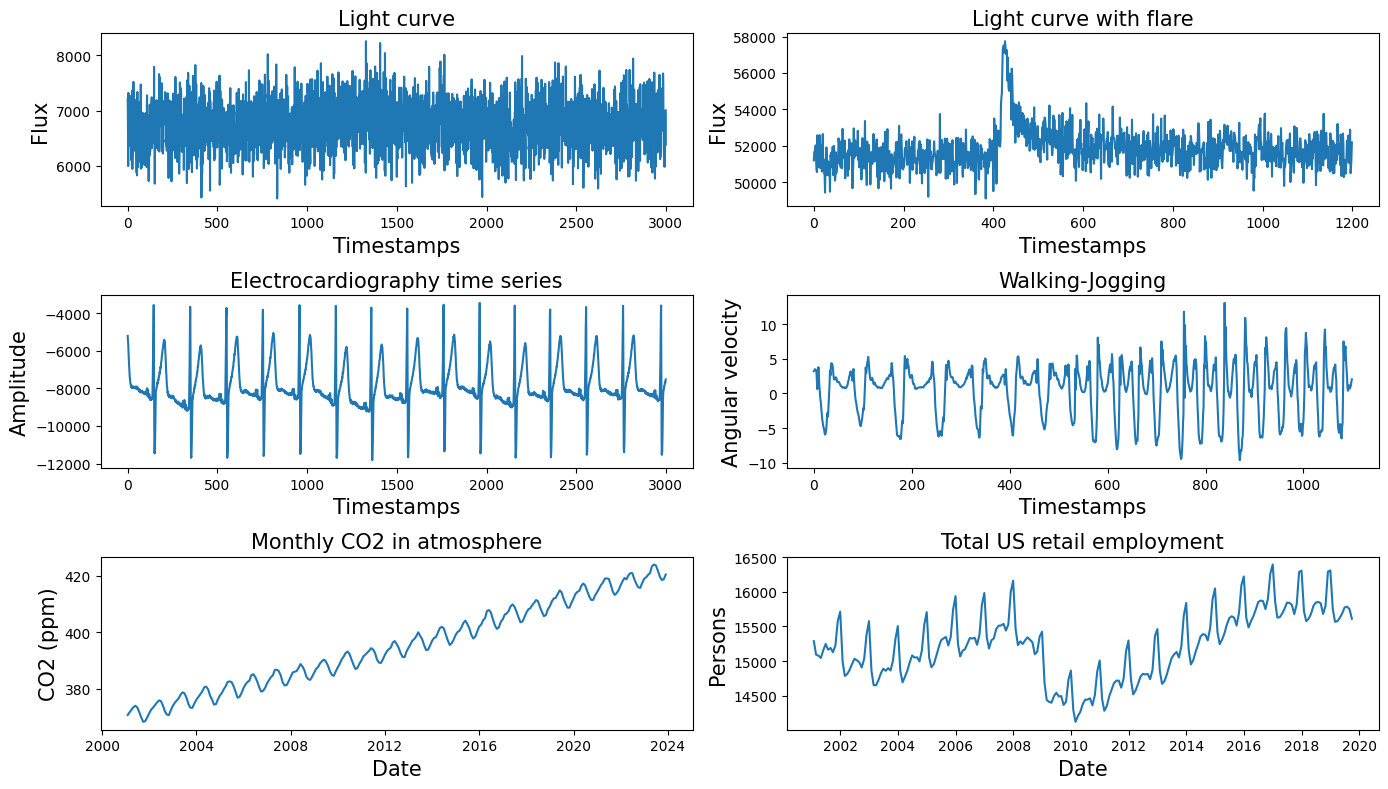

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(14, 8))
axes = axes.flatten()
raw_data = []
## LC no flare (top-left)
with open(os.path.expanduser("~/source_code/thesis_sourcecode/datasets/41245221802160640"), "r") as sample_file:
    for line in sample_file:
        raw_data.append(float(line))

axes[0].plot(raw_data[:3000])

## lc with flare (top-right)
flare = np.loadtxt(os.path.expanduser("~/source_code/thesis_sourcecode/datasets/flare_119031076.txt"))
axes[1].plot(flare[1700:2900])

## ECG (mid-left)
ecg = np.loadtxt(os.path.expanduser("~/source_code/thesis_sourcecode/datasets/TiltECG_200_25000.txt"))
axes[2].plot(ecg[:3000])

## WalkJogRun(mid-right)
walk_file = os.path.expanduser("~/source_code/thesis_sourcecode/datasets/01_WalkJogRun1.json")
# Load JSON data
with open(walk_file, 'r') as file:
    json_data = json.load(file)
walk = json_data['ts']
axes[3].plot(walk[3000:4100])

## co2 (bottom-left)
file_name = os.path.expanduser("~/source_code/thesis_sourcecode/datasets/03_co2.json")
# Load JSON data
with open(file_name, 'r') as file:
    json_data = json.load(file)

co2 = []
co2 = pd.Series(json_data['ts'])
start_date = '1958-03-01'
end_date = '2023-12-01'
date_sequence = pd.date_range(start=start_date, end=end_date, freq='ME')
co2_df = pd.DataFrame({'Date': date_sequence, 'Data': co2})
co2_df = co2_df[co2_df['Date'].dt.year  > 2000]
axes[4].plot(co2_df['Date'], co2_df['Data'])

## us retail employment (bottom-right)
us_file = os.path.expanduser("~/source_code/thesis_sourcecode/datasets/us_retail_employment.json")
# Load JSON data
with open(us_file, 'r') as file:
    json_data = json.load(file)

us_emp = pd.Series(json_data['ts'])
start_date = '1990-01-01'
end_date = '2019-10-01'
date_sequence = pd.date_range(start=start_date, end=end_date, freq='ME')
us_emp_df = pd.DataFrame({'Date': date_sequence, 'Data': us_emp})
us_emp_df = us_emp_df[us_emp_df['Date'].dt.year  > 2000]
axes[5].plot(us_emp_df['Date'], us_emp_df['Data'])

axes[0].set_title('Light curve', fontsize=15)
axes[0].set_xlabel('Timestamps', fontsize=15)
axes[0].set_ylabel('Flux', fontsize=15)

axes[1].set_title('Light curve with flare', fontsize=15)
axes[1].set_xlabel('Timestamps', fontsize=15)
axes[1].set_ylabel('Flux', fontsize=15)

axes[2].set_title('Electrocardiography time series', fontsize=15)
axes[2].set_xlabel('Timestamps', fontsize=15)
axes[2].set_ylabel('Amplitude', fontsize=15)

axes[3].set_title('Walking-Jogging', fontsize=15)
axes[3].set_xlabel('Timestamps', fontsize=15)
axes[3].set_ylabel('Angular velocity', fontsize=15)

axes[4].set_title('Monthly CO2 in atmosphere', fontsize=15)
axes[4].set_xlabel('Date', fontsize=15)
axes[4].set_ylabel('CO2 (ppm)', fontsize=15)


axes[5].set_title('Total US retail employment', fontsize=15)
axes[5].set_xlabel('Date', fontsize=15)
axes[5].set_ylabel('Persons', fontsize=15)


plt.tight_layout()
# Show the plot
plt.show()

## Table 2.1 four behaviors

## top-left

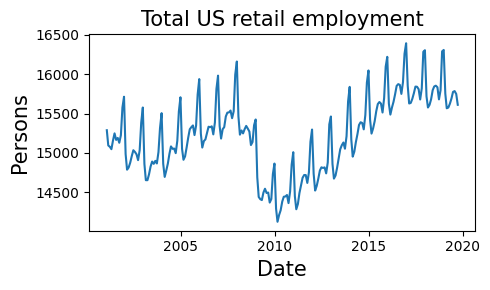

In [17]:
plt.figure(figsize=(5,3))

us_file = os.path.expanduser("~/source_code/thesis_sourcecode/datasets/us_retail_employment.json")
# Load JSON data
with open(us_file, 'r') as file:
    json_data = json.load(file)

us_emp = pd.Series(json_data['ts'])
start_date = '1990-01-01'
end_date = '2019-10-01'
date_sequence = pd.date_range(start=start_date, end=end_date, freq='ME')
us_emp_df = pd.DataFrame({'Date': date_sequence, 'Data': us_emp})
us_emp_df = us_emp_df[us_emp_df['Date'].dt.year  > 2000]
plt.plot(us_emp_df['Date'], us_emp_df['Data'])
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title('Total US retail employment', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Persons', fontsize=15)
plt.tight_layout()

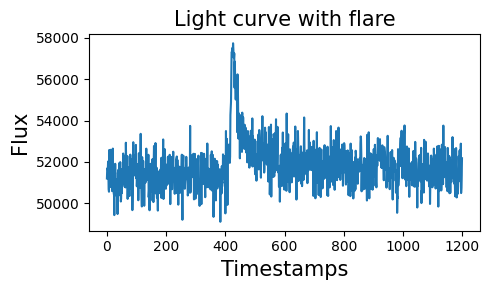

In [18]:
plt.figure(figsize=(5,3))

flare = np.loadtxt(os.path.expanduser("~/source_code/thesis_sourcecode/datasets/flare_119031076.txt"))
plt.plot(flare[1700:2900])

plt.title('Light curve with flare', fontsize=15)
plt.xlabel('Timestamps', fontsize=15)
plt.ylabel('Flux', fontsize=15)
plt.tight_layout()

## top-right

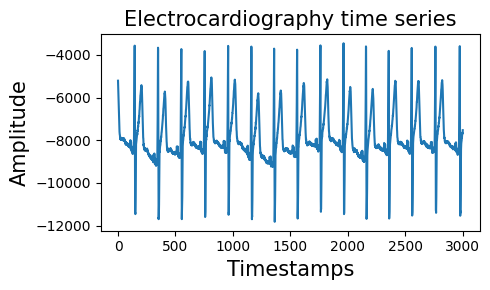

In [19]:
plt.figure(figsize=(5,3))

ecg = np.loadtxt(os.path.expanduser("~/source_code/thesis_sourcecode/datasets/TiltECG_200_25000.txt"))
plt.plot(ecg[:3000])

    

plt.title('Electrocardiography time series', fontsize=15)
plt.xlabel('Timestamps', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.tight_layout()

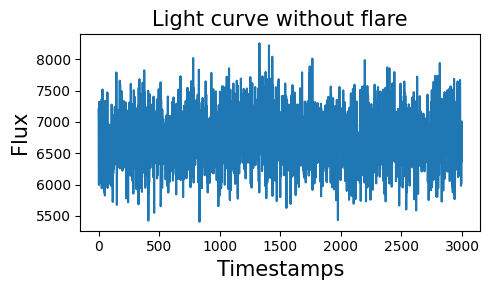

In [20]:
plt.figure(figsize=(5,3))
raw_data = []
with open(os.path.expanduser("~/source_code/thesis_sourcecode/datasets/41245221802160640"), "r") as sample_file:
    for line in sample_file:
        raw_data.append(float(line))

plt.plot(raw_data[:3000])

plt.title('Light curve without flare', fontsize=15)
plt.xlabel('Timestamps', fontsize=15)
plt.ylabel('Flux', fontsize=15)
plt.tight_layout()

## bottom-left

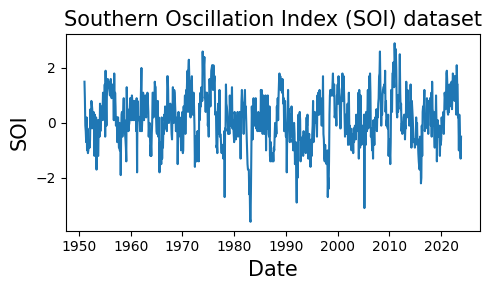

In [21]:
plt.figure(figsize=(5,3))
file_name = os.path.expanduser("~/source_code/thesis_sourcecode/datasets/05_SOI_index.json")
with open(file_name, 'r') as file:
    json_data = json.load(file)

SOI = []
SOI = pd.Series(json_data['ts'])
start_date = '1951-01-01'
end_date = '2023-11-01'
date_sequence = pd.date_range(start=start_date, end=end_date, freq='ME')
SOI_df = pd.DataFrame({'Date': date_sequence, 'Data': SOI})
plt.plot(SOI_df['Date'], SOI_df['Data'])
plt.title('Southern Oscillation Index (SOI) dataset', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('SOI', fontsize=15)
plt.tight_layout()

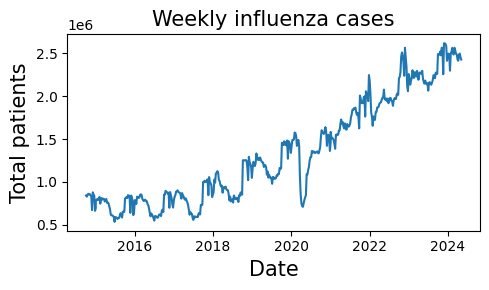

In [22]:
plt.figure(figsize=(5,3))

file_name = os.path.expanduser("~/source_code/thesis_sourcecode/datasets/ILINet_2015_2024.csv")
ill_df = pd.read_csv(file_name)
ill_df['date'] = pd.to_datetime(ill_df['YEAR'].astype(str) + ill_df['WEEK'].astype(str) + '0', format='%Y%U%w')

plt.plot(ill_df['date'], ill_df['TOTAL_PATIENTS'])
plt.title('Weekly influenza cases', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Total patients', fontsize=15)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()

## bottom-right

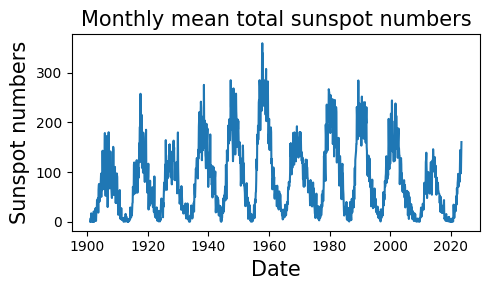

In [23]:
plt.figure(figsize=(5,3))

file_name = os.path.expanduser("~/source_code/thesis_sourcecode/datasets/06_sunspots.json")
with open(file_name, 'r') as file:
    json_data = json.load(file)

sun = []
sun = pd.Series(json_data['ts'])
start_date = '1749-01-01'
end_date = '2023-07-01'
date_sequence = pd.date_range(start=start_date, end=end_date, freq='ME')
sun_df = pd.DataFrame({'Date': date_sequence, 'Data': sun})
sun_df = sun_df[sun_df['Date'].dt.year  > 1900]
plt.plot(sun_df['Date'], sun_df['Data'])
plt.title('Monthly mean total sunspot numbers', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Sunspot numbers', fontsize=15)
plt.tight_layout()

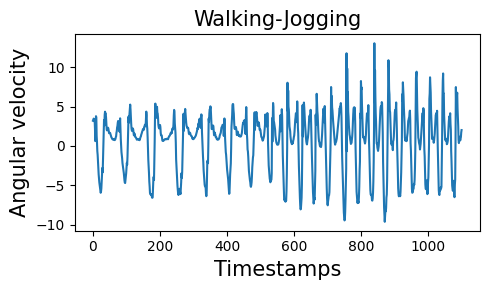

In [24]:
plt.figure(figsize=(5,3))

walk_file = os.path.expanduser("~/source_code/thesis_sourcecode/datasets/01_WalkJogRun1.json")
# Load JSON data
with open(walk_file, 'r') as file:
    json_data = json.load(file)
walk = json_data['ts']
plt.plot(walk[3000:4100])
plt.title('Walking-Jogging', fontsize=15)
plt.xlabel('Timestamps', fontsize=15)
plt.ylabel('Angular velocity', fontsize=15)
plt.tight_layout()

## Figure 2.3

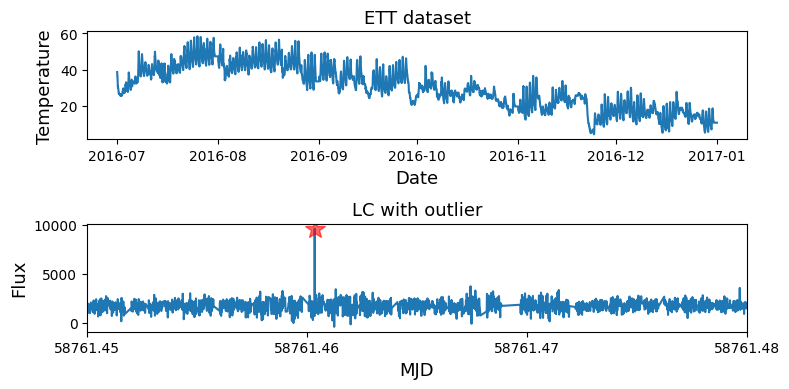

In [25]:
file_name = os.path.expanduser("~/source_code/thesis_sourcecode/datasets/ETTm2.csv")
df = pd.read_csv(file_name)
df['date'] = pd.to_datetime(df['date'])
df = df[(df['date'].dt.year == 2016)]

outlier_file = 'light_curve_Gaia-DR2_2190058421855697536_date20191005'
outlier_lc = get_data_from_file(outlier_file)   ## check this method for more detail
outlier_timestamp = np.argmax(outlier_lc['instances'])
fig, axes = plt.subplots(2, 1, figsize=(8, 4))

axes[0].plot(df['date'], df['OT'])
axes[0].set_xlabel('Date', fontsize=13)
axes[0].set_ylabel('Temperature', fontsize=13)
axes[0].set_title('ETT dataset', fontsize=13)

axes[1].plot(outlier_lc['timestamps'],outlier_lc['instances'])
axes[1].set_title('LC with outlier', fontsize=13)
axes[1].set_xlabel('MJD', fontsize=13)
axes[1].set_ylabel('Flux', fontsize=13)
axes[1].set_xlim([58761.45, 58761.48])
axes[1].plot(outlier_lc['timestamps'][outlier_timestamp], outlier_lc['instances'][outlier_timestamp], 'r*', markersize=15, alpha = 0.6)
axes[1].xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
axes[1].xaxis.set_major_locator(ticker.MultipleLocator(0.01))
plt.tight_layout()
plt.show()

## Figure 2.4

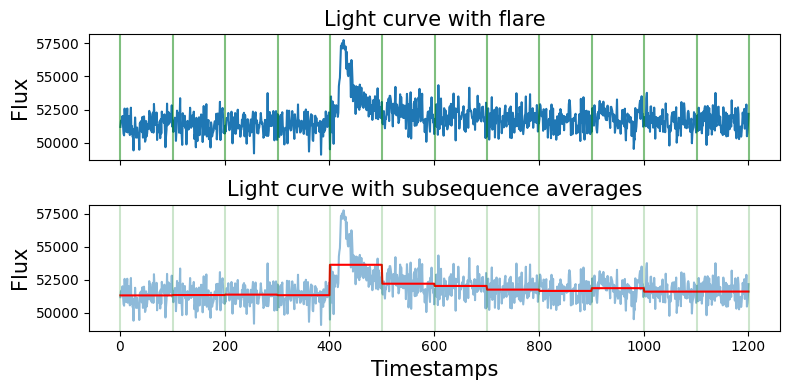

In [26]:
flare = np.loadtxt(os.path.expanduser("~/source_code/thesis_sourcecode/datasets/flare_119031076.txt"))
ts = np.array(flare[1700:2900])

segment_length = 100
num_segments = len(ts) // segment_length

segmented_data = ts[:num_segments * segment_length].reshape(-1, segment_length)
segment_means = np.mean(segmented_data, axis=1)
full_segment_series = np.repeat(segment_means, segment_length)
fig, axes = plt.subplots(2, 1, figsize=(8, 4), sharex=True)

axes[0].set_title('Light curve with flare', fontsize=15)
axes[0].plot(range(1,len(ts)+1),ts, label='Time series data')
axes[0].set_ylabel('Flux', fontsize=15)

axes[1].set_title('Light curve with subsequence averages', fontsize=15)
axes[1].plot(range(1,len(ts)+1),ts, alpha=0.5, label='Time series data')
axes[1].plot(range(1,len(ts)+1),full_segment_series, 'r', label='Sketching result')
axes[1].set_xlabel('Timestamps', fontsize=15)
axes[1].set_ylabel('Flux', fontsize=15)

for i in np.arange(0,len(ts)+segment_length,segment_length):
    axes[0].axvline(i+1, color='g', alpha=0.5)
    axes[1].axvline(i+1, color='g', alpha=0.2)

plt.tight_layout()
# Show the plot
plt.show()

## Figure 2.5

/var/folders/39/cpb13rr53hx1nyfrgqhk18pc0000gn/T/ipykernel_38140/3272655777.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', num_segments)  # 'viridis' is a good perceptually uniform colormap


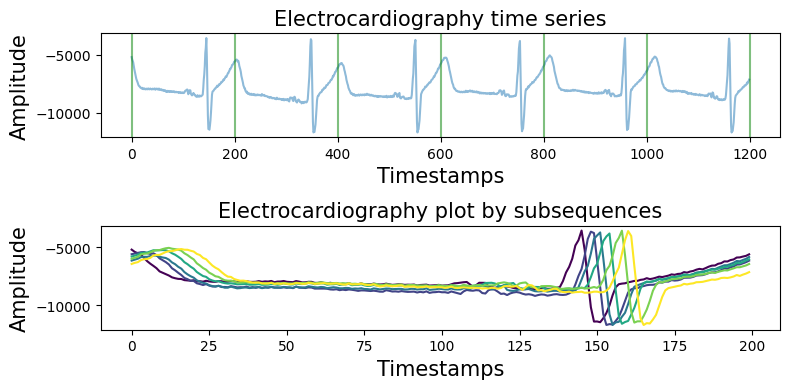

In [27]:
ecg = np.loadtxt(os.path.expanduser("~/source_code/thesis_sourcecode/datasets/TiltECG_200_25000.txt"))
ts = ecg[:1200]
segment_length = 200
num_segments = len(ts) // segment_length
fig, axes = plt.subplots(2, 1, figsize=(8, 4))
axes[0].plot(ts,alpha=0.5)
for i in np.arange(0,len(ts)+segment_length,segment_length):
    axes[0].axvline(i, color='g', alpha=0.5)
    
axes[0].set_title('Electrocardiography time series', fontsize=15)
axes[0].set_xlabel('Timestamps', fontsize=15)
axes[0].set_ylabel('Amplitude', fontsize=15)
    
cmap = cm.get_cmap('viridis', num_segments)  # 'viridis' is a good perceptually uniform colormap
for i in range(num_segments):
    segment_start = i * segment_length
    segment_end = segment_start + segment_length
    segment_color = cmap(i)  # Get a color from the colormap
    plt.plot(ts[segment_start:segment_end], label=f'Segment {i+1}', color=segment_color)
    
axes[1].set_title('Electrocardiography plot by subsequences', fontsize=15)
axes[1].set_xlabel('Timestamps', fontsize=15)
axes[1].set_ylabel('Amplitude', fontsize=15)
    
plt.tight_layout()
# Show the plot
plt.show()